<center>
    <h1>Mohamed Nasser Aboelnasr</h1>
</center>

### Image noise is random variation of brightness or color information in the images captured. It is degradation in image signal caused by external sources. Images containing multiplicative noise have the characteristic that the brighter the area the noisier it is. But mostly it is additive. We can model a noisy image in various ways.



### `There are different types of image noise:`

1. `**Gaussian Noise**:`
Gaussian Noise is a statistical noise having a probability density function equal to normal distribution, also known as Gaussian Distribution. Random Gaussian function is added to Image function to generate this noise.

  `The magnitude of Gaussian Noise depends on the Standard Deviation(sigma). Noise Magnitude is directly proportional to the sigma value`.
  

2. `**Salt and Pepper Noise**:` Salt and Pepper noise is added to an image by addition of both random bright (with 255 pixel value) and random dark (with 0 pixel value) all over the image.This model is also known as data drop noise because statistically it drop the original data values.

## Import Packages

In [1]:
import plotly.express as px
from math import log10, sqrt
import numpy as np
from sklearn.decomposition import PCA
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Define Functions

In [2]:
def noisy(noise_type, image):
  """
  Add noise to an image with specified noise type.

  Parameters
  ----------
  noise_type: {'gauss', 's&p'}
      Specifies the noise type to be used in the function.
      It must be one of 'gauss', or 's&p'.

  image: {array-like, sparse matrix} of shape (height, width, channels)
      Describes matrix representation of an image to be used in the function.
      It must be of three dimensions, height: considered as number of rows, width: considered as number of columns
       and channels: considered as number of colors representing the image.

  Returns
  -------
  noisy, out: {array-like, sparse matrix} of shape (height, width, channels)
      Describes matrix representation of the image after applying the noise type.
      noisy: when noise_type='gauss' and out: when noise_type='s&p'.
  """
  if noise_type == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 1024.0
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy

  elif noise_type == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.025
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out

In [3]:
def PSNR(original, filtered):
    """
    Estimate the efficiency of filtering method.

    Parameters
    ----------
    original: {array-like, sparse matrix} of shape (height, width, channels)
        Describes matrix representation of the original image to be used in the function.
        It must be of three dimensions, height: considered as number of rows, width: considered as number of columns
        and channels: considered as number of colors representing the image.

    filtered: {array-like, sparse matrix} of shape (height, width, channels)
        Describes matrix representation of the filtered image to be used in the function.
        It must be of three dimensions, height: considered as number of rows, width: considered as number of columns
        and channels: considered as number of colors representing the image.

    Returns
    -------
    100, psnr: float
        Describes Peak Signal-to-Noise Ratio.
        100: when mse=0 and psnr: otherwise.
    """
    mse = np.mean((original - filtered) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [4]:
def plot_components_vs_purity_level(original, the_range):
    """
    Plot purity/efficiency level vs number of components.

    Parameters
    ----------
    original: {array-like, sparse matrix} of shape (height, width, channels)
        Describes matrix representation of the original image to be used in the function.
        It must be of three dimensions, height: considered as number of rows, width: considered as number of columns
        and channels: considered as number of colors representing the image.

    the_range: {array-like, list} of shape (points,)
        Represents points or values of n_components to be used in the PCA function.
        It must be array of integers.

    """
    values = []
    for comp in the_range.astype('int'):
      pca = PCA(comp)
      trans = pca.fit_transform(original)
      filt = pca.inverse_transform(trans)
      values.append(PSNR(original, filt))

    fig = px.line(x=the_range, y=values, title='Purity vs Components', labels={'x':'number of components', 'y':'purity/efficiency level'})
    fig.show()

## Load Image that we'll work on

In [5]:
img = cv2.imread("image.jpg", cv2.IMREAD_UNCHANGED)
img.shape

(4096, 6144, 3)

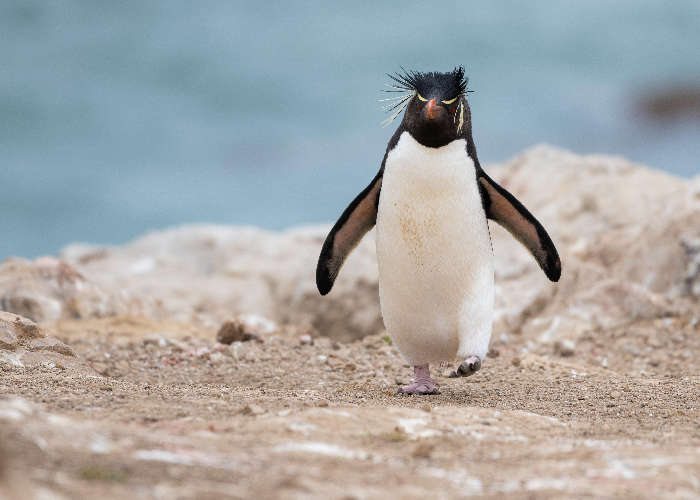

In [6]:
cv2_imshow(cv2.resize(img, (700, 500)))

## Apply **Salt and Pepper** noise

In [7]:
sp_image = noisy('s&p', img)
sp_image.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



(4096, 6144, 3)

Salt and Pepper Noise


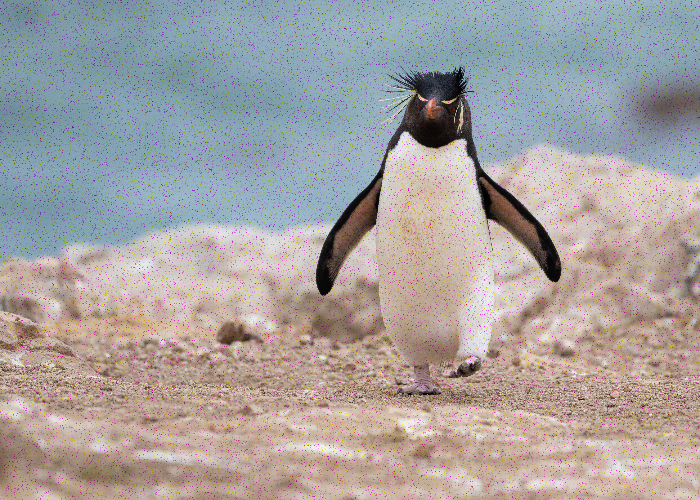

In [8]:
print('Salt and Pepper Noise')
cv2_imshow(cv2.resize(sp_image, (700, 500)))

In [9]:
# save image
cv2.imwrite('sp_image.png', sp_image)

True

## Apply **Gaussian** noise

In [10]:
gauss_image = noisy('gauss', img)
gauss_image.shape

(4096, 6144, 3)

Gaussian Noise


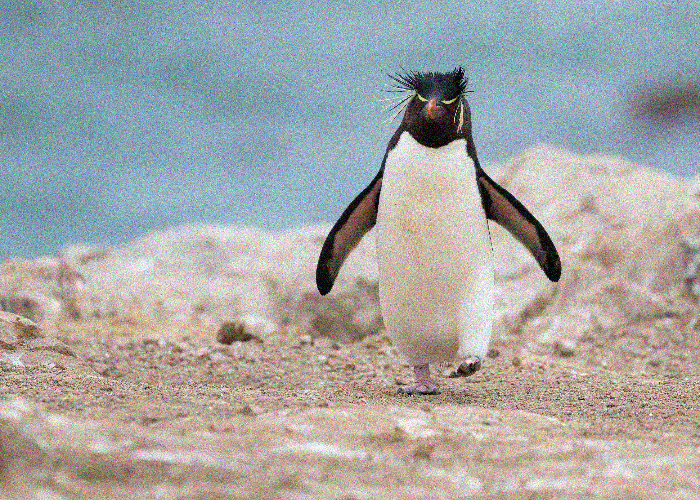

In [11]:
print('Gaussian Noise')
cv2_imshow(cv2.resize(gauss_image, (700, 500)))

In [12]:
# save image
cv2.imwrite('gauss_image.png', gauss_image)

True

In [13]:
# load noisy image
sp_n_image = cv2.imread("sp_image.png", cv2.IMREAD_GRAYSCALE)
sp_n_image.shape

(4096, 6144)

In [14]:
# load noisy image
gauss_n_image = cv2.imread("gauss_image.png", cv2.IMREAD_GRAYSCALE)
gauss_n_image.shape

(4096, 6144)

## **PCA as Noise Filtering**

### PCA can be used as a filtering approach for noisy data. The idea is that any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

### As a measure of efficiency of the filter for the image, we will use a metric that is called <br>**`Peak Signal-to-Noise Ratio (PSNR)`**.
### **PSNR** is the ratio between the maximum possible power of an image and the power of corrupting noise that affects the quality of its representation. To estimate the PSNR of an image, it is necessary to compare that image to an ideal clean image with the maximum possible power.
### PSNR is most commonly used to estimate the efficiency of compressors, filters, etc. `The larger the value of PSNR`, `the more efficient` is a corresponding compression or filter method.

# 1) **Salt and Pepper Noise**

## Load **salt and pepper** noisy image in grayscale

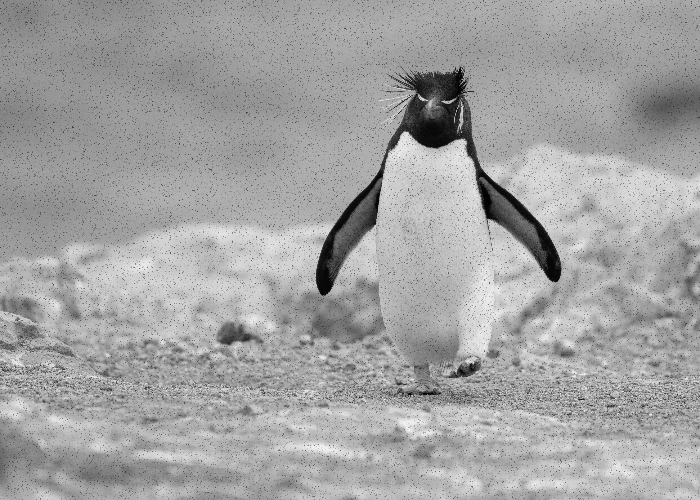

In [15]:
cv2_imshow(cv2.resize(sp_n_image, (700, 500)))

## Apply PCA to reduce noise

### Keeping 50% explained variance of components

In [16]:
pca = PCA(0.5).fit(sp_n_image)
pca.n_components_

8

After applying PCA to salt&pepper noisy image


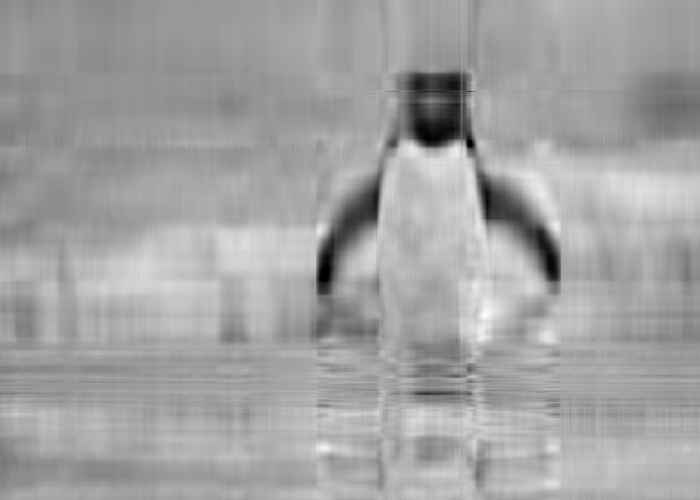

In [17]:
components = pca.transform(sp_n_image)
filtered = pca.inverse_transform(components)

print('After applying PCA to salt&pepper noisy image')
cv2_imshow(cv2.resize(filtered, (700, 500)))

## Visualize number of components and explained variance

In [18]:
d = pca.components_.shape[0]
x_ax = np.linspace(1, d, d)
y_ax = pca.explained_variance_ratio_.cumsum()

fig = px.line(x=x_ax, y=y_ax, title='Variance vs Components', labels={'x':'number of components', 'y':'cumulative explained variance'})
fig.show()

## Visualize effect of principal components

In [19]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

fig = px.bar(x=labels, y=per_var, labels={'x':'Principal Components', 'y':'Percentage of Explained Variance'})
fig.show()

## Visualize `number of components and purity level` **(PSNR)**

In [20]:
PSNR(sp_n_image, filtered)

20.02826723118656

In [21]:
comps = np.linspace(100, 1500, 15)
plot_components_vs_purity_level(sp_n_image, comps)

# 2) **Gaussian Noise**

## Load **gaussian** noisy image in grayscale

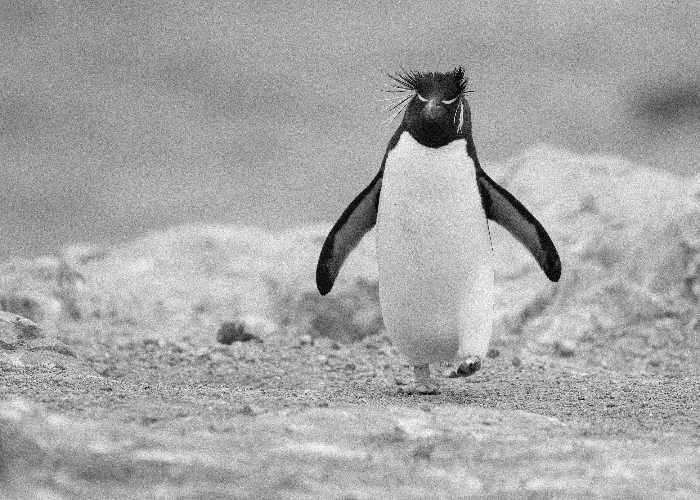

In [22]:
cv2_imshow(cv2.resize(gauss_n_image, (700, 500)))

## Apply PCA to reduce noise

### Keeping 50% explained variance of components

In [23]:
pca = PCA(0.5).fit(gauss_n_image)
pca.n_components_

10

After applying PCA to gaussian noisy image


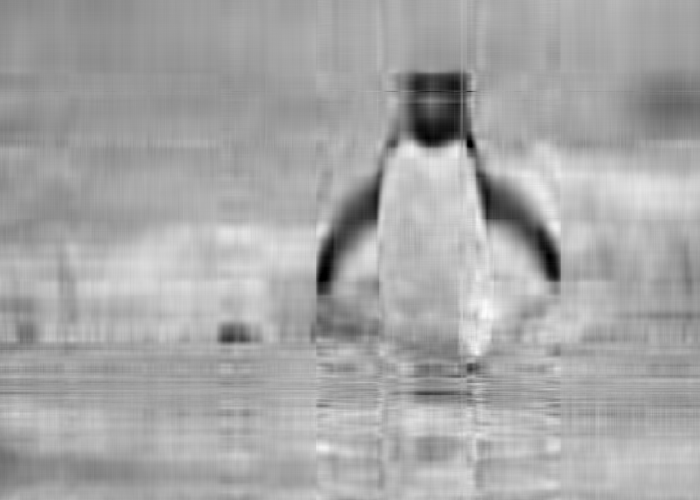

In [24]:
components = pca.transform(gauss_n_image)
filtered = pca.inverse_transform(components)

print('After applying PCA to gaussian noisy image')
cv2_imshow(cv2.resize(filtered, (700, 500)))

## Visualize number of components and explained variance

In [25]:
d = pca.components_.shape[0]
x_ax = np.linspace(1, d, d)
y_ax = pca.explained_variance_ratio_.cumsum()

fig = px.line(x=x_ax, y=y_ax, title='Variance vs Components', labels={'x':'number of components', 'y':'cumulative explained variance'})
fig.show()

## Visualize effect of principal components

In [26]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

fig = px.bar(x=labels, y=per_var, labels={'x':'Principal Components', 'y':'Percentage of Explained Variance'})
fig.show()

## Visualize `number of components and purity level` **(PSNR)**

In [27]:
PSNR(gauss_n_image, filtered)

19.76897280213371

In [28]:
comps = np.linspace(100, 1500, 15)
plot_components_vs_purity_level(gauss_n_image, comps)

---

# **Trying to combine both noises in one image**

# 3) **Salt&Pepper Noise + Gaussian Noise**

## Apply both noises

In [29]:
noise_1 = noisy('gauss', img)
noise_2 = noisy('s&p', noise_1)
comb_noise = noise_2
comb_noise.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



(4096, 6144, 3)

After applying both noises


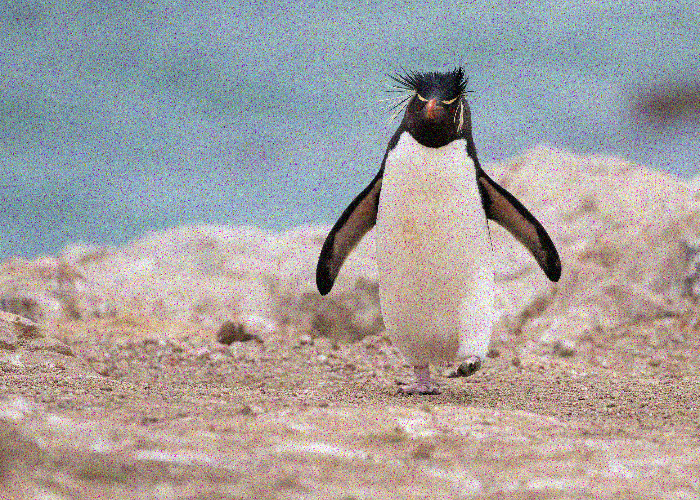

In [30]:
print('After applying both noises')
cv2_imshow(cv2.resize(comb_noise, (700, 500)))

In [31]:
# save image
cv2.imwrite('comb_noise.png', comb_noise)

True

## Load **combined noise** image in grayscale

In [32]:
comb_noise_image = cv2.imread("comb_noise.png", cv2.IMREAD_GRAYSCALE)
comb_noise_image.shape

(4096, 6144)

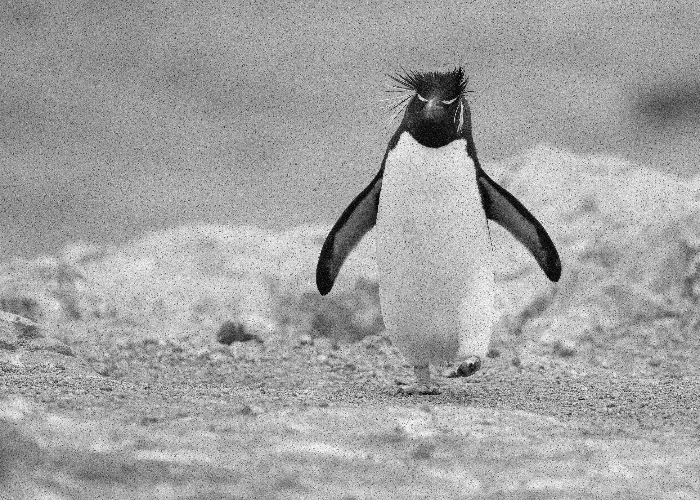

In [33]:
cv2_imshow(cv2.resize(comb_noise_image, (700, 500)))

## Apply PCA to reduce noise

> Keeping 50% explained variance of components

In [34]:
pca = PCA(0.5).fit(comb_noise_image)
pca.n_components_

52

After applying PCA to combined noise image


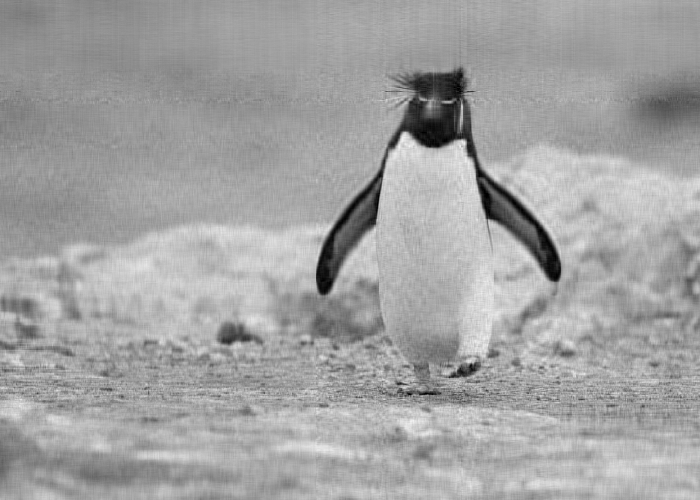

In [35]:
components = pca.transform(comb_noise_image)
filtered = pca.inverse_transform(components)

print('After applying PCA to combined noise image')
cv2_imshow(cv2.resize(filtered, (700, 500)))

## Visualize number of components and explained variance

In [36]:
d = pca.components_.shape[0]
x_ax = np.linspace(1, d, d)
y_ax = pca.explained_variance_ratio_.cumsum()

fig = px.line(x=x_ax, y=y_ax, title='Variance vs Components', labels={'x':'number of components', 'y':'cumulative explained variance'})
fig.show()

## Visualize effect of principal components

In [37]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

fig = px.bar(x=labels, y=per_var, labels={'x':'Principal Components', 'y':'Percentage of Explained Variance'})
fig.show()

## Visualize `number of components and purity level` **(PSNR)**

In [38]:
PSNR(comb_noise_image, filtered)

18.852306786514422

In [39]:
comps = np.linspace(100, 1500, 15)
plot_components_vs_purity_level(comb_noise_image, comps)

---

# **Trying to apply two stages of PCA on combined noise image**

# 4) **2S-PCA**

> ## Applying transformation for **95% explained variance** at `first satge`, then applying **90% explained variance** at `second stage`.

In [40]:
pca_s1 = PCA(0.95).fit(comb_noise_image)
trans_s1 = pca_s1.transform(comb_noise_image)
trans_s1.shape

(4096, 2474)

In [41]:
filtered_s1 = pca_s1.inverse_transform(trans_s1)
filtered_s1.shape

(4096, 6144)

In [42]:
pca_s2 = PCA(0.9).fit(filtered_s1)
trans_s2 = pca_s2.transform(filtered_s1)
trans_s2.shape

(4096, 1514)

In [43]:
filtered_s2 = pca_s2.inverse_transform(trans_s2)
filtered_s2.shape

(4096, 6144)

In [44]:
pca_s2.n_components_

1514

In [45]:
PSNR(comb_noise_image, filtered_s2)

24.228561270348695

### PSNR values increased but it depends on percentage of explained variance as we got more components.

After applying two satges of PCA on combined noise image


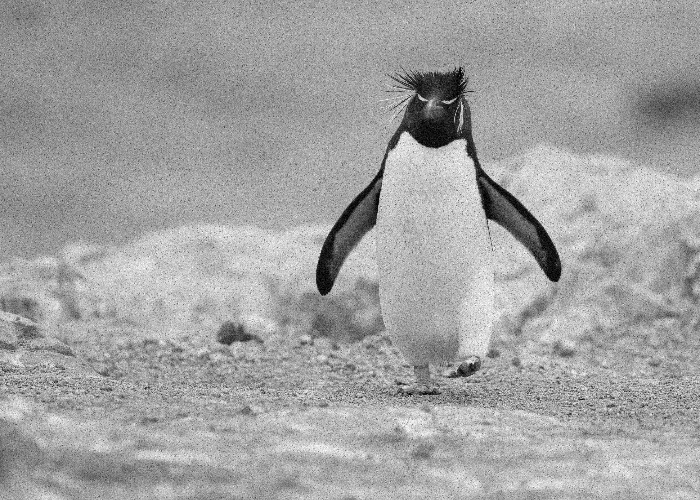

In [46]:
print('After applying two satges of PCA on combined noise image')
cv2_imshow(cv2.resize(filtered_s2, (700, 500)))